# Classification and prediction of Heart Disease

In [2]:
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
df = pd.read_csv("clean_data.csv",index_col = 0)
df.head(5)

C:\Users\HusseinRizkana\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\HusseinRizkana\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\HusseinRizkana\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\HusseinRizkana\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\HusseinRizkana\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may

,age,resting_bp,chol,max_hrt_rt,st_dep,major_vessels,target,sex_male,chest_pain_atypical_angina,chest_pain_non-anginal_pain,chest_pain_typical_angina,fstng_bld_sgr_not_high,elect_result_left_ventricular_hypertrophy,elect_result_normal,exercise_induced_angina_present,st_slope_flat,st_slope_upsloping,thalassemia_fixed_defect,thalassemia_reversable_defect
0,63,145,233,150,2.3,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,1,1,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,0,0,1,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,0,0,1,0


# Splitting the Data

In [3]:
X = df.drop("target",axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)
print("train size =", len(X_train))
# print("val size =", len(X_val))
print("test size =", len(X_test))

train size = 240
test size = 61


# Feature Selection
## p-values to check for feature significance

In [4]:
p_max = 0.2
dropped_cols = []
while p_max > 0.1:
    model = sm.Logit(y_train,X_train.drop(dropped_cols,axis=1)).fit()
    p_values = model.pvalues
    p_max = 0.04
    col = None
    for key in p_values.keys():
        if p_values[key] > p_max:
            p_max = p_values[key]
            col = key
    if col != None:
        dropped_cols.append(col)
    print(p_max)
print(dropped_cols)
model.summary()

Optimization terminated successfully.
         Current function value: 0.324066
         Iterations 7
0.8413293116042454
Optimization terminated successfully.
         Current function value: 0.324150
         Iterations 7
0.844535596309244
Optimization terminated successfully.
         Current function value: 0.324229
         Iterations 7
0.8357074569081393
Optimization terminated successfully.
         Current function value: 0.324320
         Iterations 7
0.7526539449807639
Optimization terminated successfully.
         Current function value: 0.324528
         Iterations 7
0.6694206259400357
Optimization terminated successfully.
         Current function value: 0.324908
         Iterations 7
0.620111995567687
Optimization terminated successfully.
         Current function value: 0.325439
         Iterations 7
0.4988272800145892
Optimization terminated successfully.
         Current function value: 0.326393
         Iterations 7
0.39593722793841857
Optimization terminated successfu

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  240
Model:                          Logit   Df Residuals:                      233
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                  0.5105
Time:                        11:43:23   Log-Likelihood:                -81.025
converged:                       True   LL-Null:                       -165.52
Covariance Type:            nonrobust   LLR p-value:                 7.361e-34
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
max_hrt_rt                          0.0190      0.003      6.745      0.000       0.013       0.025
st_dep                             -0.4596      0.203     -2.268      0.023      -0.857      -0.062
major_vessels                      -0.7978      0.198     -4.039      0.000      -1.185      -0.411
chest_pain_non-anginal_pain         1.3764      0.477      2.886      0.004       0.442       2.311
elect_result_normal                -1.2397      0.414     -2.996      0.003      -2.051      -0.429
exercise_induced_angina_present    -1.7329      0.458     -3.787      0.000      -2.630      -0.836
thalassemia_reversable_defect      -2.1070      0.425     -4.963      0.000      -2.939      -1.275
===================================================================================================
"""

Checking feature significance using null-hypothesis testing. If p-value is greater than 0.1 then we accept the null hypothesis and reject feature as having a statistically significant effect on predicting variance of the target variable. usually the alpha value would be set to 0.05 however I am hesitant to execessively remove features due to the limited amount of data I am using.

## checking for multi-colinearity

In [5]:
# for col in X_train.columns.drop(dropped_cols):
#     model = sm.OLS(X_train[col],X_train.drop(col,axis=1)).fit()
#     VIF = 1/(1-model.rsquared)
#     print(f"{col} VIF value:",VIF)
#     if VIF > 10:
#         print(col)
#         dropped_cols.append(col)

Here we check for and drop the values with VIF(Variance inflation factor) that is too high meaning that the variance in this feature is fully captured by the other features. A VIF threshold of 10 was used as this indicates an Rsquared of above 0.9

In [6]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


In [7]:
logreg = sm.Logit(y_train,X_train.drop(dropped_cols,axis=1)).fit()

Optimization terminated successfully.
         Current function value: 0.337606
         Iterations 7


## interactions and higher order features

Normally residuals would be used to check for distributions that might lead to the use of higher order polynomials but due to a lack of time, brute force was used here.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [9]:
polyfit = PolynomialFeatures(degree=3)
scaler = StandardScaler()
X_poly = polyfit.fit_transform(X_train)
scaled_poly_train = pd.DataFrame(scaler.fit_transform(X_poly),index=X_train.index)

In [10]:
# import numpy as np
# p_max = 0.2
# dropped_cols = []

# while p_max > 0.1:
# model = sm.Logit(y_train,scaled_poly_train.drop(dropped_cols, axis=1)).fit()
#     p_values = model.pvalues
#     p_max = 0.04
#     col = None
#     for key in p_values.keys():
#         if p_values[key] > p_max:
#             p_max = p_values[key]
#             col = key
#     if col != None:
#         dropped_cols.append(col)
#         print(dropped_cols)
#     print(p_max)
# print(dropped_cols)
# model.summary()

# Threshold selection
With heart disease it is better to be safe than sorry as peoples lives are at stake. Therefore we have a preference towards a higher true positive rate. Using metz: $ m = \frac{1-prevalence}{prevalence} \frac{Cfp - Ctn}{Cfn - Ctp}$ where C stands for cost. we then choose the threshold with the highest $f_{m} = TPR - m(FPR)$ an m value of 0.13 was found to predict the target with a preference to over diagnose heart disease than under diagnose due to the humanitarian and monetary consequences. max $f_{m}$ will then be taken for each model.

In [11]:
prevalence = len(y_train.loc[y_train==1])/len(y_train)
Cfp = 5000 #5000 cost of extra tests assumed here to be CT scan and MRI cardiac scan  
Ctn = 0 #0 go home you're safe
Cfn = 32000 #32000 Egyptian pounds approx which is the cost of valve replacement surgery... plus possibly human life
Ctp = 0 #0 possibly save someones life
m = ((1-prevalence)/(prevalence)) * (Cfp/Cfn)
m

0.1322115384615385

# Optimisation and model selection

Here we try a bunch of different classification models and their combinations to see what works best. 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score,
                           roc_curve, auc, recall_score, make_scorer)
from sklearn.model_selection import cross_val_score, cross_validate
import plotly.figure_factory as ff
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from IPython.display import Image
import pydotplus

C:\Users\HusseinRizkana\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\HusseinRizkana\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [43]:
import numpy as np
svc = SVC(gamma=0.0003,kernel="rbf",probability = True)
val_svc = cross_validate(svc, X_train.drop(dropped_cols,axis=1), y_train, scoring=["accuracy", "recall"], cv=5, return_train_score=True)
print("Training Accuracy:", np.mean(val_svc["train_accuracy"]))
print("Training recall:", np.mean(val_svc["train_recall"]))
print("Validation Accuracy:", np.mean(val_svc["test_accuracy"]))
print("Validation recall:", np.mean(val_svc["test_recall"]))

Training Accuracy: 0.7072916666666667
Training recall: 0.7711538461538462
Validation Accuracy: 0.7041666666666667
Validation recall: 0.7692307692307693


In [42]:
logreg = LogisticRegression()
val_logreg = cross_validate(logreg, X_train.drop(dropped_cols,axis=1), y_train, scoring=["accuracy", "recall"], cv=5, return_train_score=True)

print("Training Accuracy:", np.mean(val_logreg["train_accuracy"]))
print("Training recall:", np.mean(val_logreg["train_recall"]))
print("Validation Accuracy:", np.mean(val_logreg["test_accuracy"]))
print("Validation recall:", np.mean(val_logreg["test_recall"]))

Training Accuracy: 0.8604166666666668
Training recall: 0.9057692307692309
Validation Accuracy: 0.8375
Validation recall: 0.8846153846153847
C:\Users\HusseinRizkana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train.drop(dropped_cols, axis=1),y_train)
KNeighborsClassifier(algorithm="auto", metric="euclidean",
 metric_params=None, n_jobs=5, n_neighbors=20)
val_knn = cross_validate(knn, X_train.drop(dropped_cols,axis=1), y_train, scoring=["accuracy", "recall"], cv=5, return_train_score=True)

print("Training Accuracy:", np.mean(val_knn["train_accuracy"]))
print("Training recall:", np.mean(val_knn["train_recall"]))
print("Validation Accuracy:", np.mean(val_knn["test_accuracy"]))
print("Validation recall:", np.mean(val_knn["test_recall"]))

Training Accuracy: 0.81875
Training recall: 0.9019230769230768
Validation Accuracy: 0.7249999999999999
Validation recall: 0.8230769230769232


In [44]:
tre = DecisionTreeClassifier(criterion="gini",random_state = 42, max_depth=5,
                            min_samples_split=11,min_samples_leaf=2, class_weight ="balanced")
val_tre = cross_validate(tre, X_train.drop(dropped_cols,axis=1), y_train, scoring=["accuracy", "recall"], cv=5, return_train_score=True)

print("Training Accuracy:", np.mean(val_tre["train_accuracy"]))
print("Training recall:", np.mean(val_tre["train_recall"]))
print("Validation Accuracy:", np.mean(val_tre["test_accuracy"]))
print("Validation recall:", np.mean(val_tre["test_recall"]))

Training Accuracy: 0.8791666666666667
Training recall: 0.8576923076923076
Validation Accuracy: 0.7958333333333334
Validation recall: 0.8


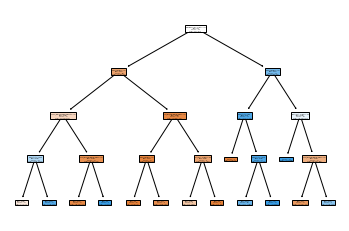

In [19]:
fig = tree.plot_tree(tre, feature_names=X_train.drop(dropped_cols, axis=1).columns, filled=True)

In [60]:
rfc = RandomForestClassifier(n_estimators=100, warm_start=True, max_depth=3, min_samples_leaf=3, max_features=4)
val_rfc = cross_validate(rfc, X_train.drop(dropped_cols,axis=1), y_train, scoring=["accuracy", "recall"], cv=5, return_train_score=True)

print("Training Accuracy:", np.mean(val_rfc["train_accuracy"]))
print("Training recall:", np.mean(val_rfc["train_recall"]))
print("Validation Accuracy:", np.mean(val_rfc["test_accuracy"]))
print("Validation recall:", np.mean(val_rfc["test_recall"]))


Training Accuracy: 0.8802083333333333
Training recall: 0.9230769230769231
Validation Accuracy: 0.8333333333333334
Validation recall: 0.9


In [65]:
bag = BaggingClassifier(n_estimators=1000, bootstrap_features=True, n_jobs=4)
val_bag = cross_validate(bag, X_train.drop(dropped_cols,axis=1), y_train, scoring=["accuracy", "recall"], cv=5, return_train_score=True)

print("Training Accuracy:", np.mean(val_bag["train_accuracy"]))
print("Training recall:", np.mean(val_bag["train_recall"]))
print("Validation Accuracy:", np.mean(val_bag["test_accuracy"]))
print("Validation recall:", np.mean(val_bag["test_recall"]))

Training Accuracy: 0.990625
Training recall: 1.0
Validation Accuracy: 0.825
Validation recall: 0.8615384615384617


In [74]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=1000, max_depth=3,
     random_state=42, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True,  n_jobs=6, warm_start=True)
val_etc = cross_validate(etc, X_train.drop(dropped_cols,axis=1), y_train, scoring=["accuracy", "recall"], cv=5, return_train_score=True)

print("Training Accuracy:", np.mean(val_etc["train_accuracy"]))
print("Training recall:", np.mean(val_etc["train_recall"]))
print("Validation Accuracy:", np.mean(val_etc["test_accuracy"]))
print("Validation recall:", np.mean(val_etc["test_recall"]))

Training Accuracy: 0.865625
Training recall: 0.9096153846153847
Validation Accuracy: 0.8083333333333333
Validation recall: 0.8692307692307694


In [93]:
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_predict
parameters_logreg = {}
y_score0 = cross_val_predict(logreg, X_train.drop(dropped_cols, axis=1), y_train, cv=5, method='predict_proba')[:,1]
logreg_fpr, logreg_tpr, logregthresh = roc_curve(y_train, y_score0)
auc_log = auc(logreg_fpr, logreg_tpr)
fig0 = go.Scatter(x=logreg_fpr, y=logreg_tpr, name=f"LogReg ROC AUC={auc_log:.2f}")

parameters_knn = {}
y_score1 = cross_val_predict(knn, X_train.drop(dropped_cols, axis=1), y_train, cv=5, method='predict_proba')[:,1]
log_fpr, log_tpr, thresh = roc_curve(y_train, y_score1)
auc_log = auc(log_fpr, log_tpr)
fig1 = go.Scatter(x=log_fpr, y=log_tpr, name=f"KNN ROC AUC={auc_log:.2f}")

parameters_tre = {}
y_score2 = cross_val_predict(tre, X_train.drop(dropped_cols, axis=1), y_train, cv=5, method='predict_proba')[:,1]
log_fpr, log_tpr, thresh = roc_curve(y_train, y_score2)
auc_log = auc(log_fpr, log_tpr)
fig2 = go.Scatter(x=log_fpr, y=log_tpr, name=f"DecisionTree ROC AUC={auc_log:.2f}")

parameters_svc = {}
y_score3 = cross_val_predict(svc, X_train.drop(dropped_cols, axis=1), y_train, cv=5, method='predict_proba')[:,1]
log_fpr, log_tpr, thresh = roc_curve(y_train, y_score3)
auc_log = auc(log_fpr, log_tpr)
fig3 = go.Scatter(x=log_fpr, y=log_tpr, name=f"SVC ROC AUC={auc_log:.2f}")

parameters_rfc = {}
y_score4 = cross_val_predict(rfc, X_train.drop(dropped_cols, axis=1), y_train, cv=5, method='predict_proba')[:,1]
log_fpr, log_tpr, thresh = roc_curve(y_train, y_score4)
auc_log = auc(log_fpr, log_tpr)
fig4 = go.Scatter(x=log_fpr, y=log_tpr, name=f"RFC ROC AUC={auc_log:.2f}")

parameters_bag = {}
y_score5 = cross_val_predict(bag, X_train.drop(dropped_cols, axis=1), y_train, cv=5, method='predict_proba')[:,1]
log_fpr, log_tpr, thresh = roc_curve(y_train, y_score5)
auc_log = auc(log_fpr, log_tpr)
fig5 = go.Scatter(x=log_fpr, y=log_tpr, name=f"bag ROC AUC={auc_log:.2f}")

y_score6 = cross_val_predict(etc, X_train.drop(dropped_cols, axis=1), y_train, cv=5, method='predict_proba')[:,1]
log_fpr, log_tpr, thresh = roc_curve(y_train, y_score6)
auc_log = auc(log_fpr, log_tpr)
fig6 = go.Scatter(x=log_fpr, y=log_tpr, name=f"etc ROC AUC={auc_log:.2f}")

figure = go.Figure()
figure.add_trace(fig0)
figure.add_trace(fig1)
figure.add_trace(fig2)
figure.add_trace(fig3)
figure.add_trace(fig4)
figure.add_trace(fig5)
figure.add_trace(fig6)


C:\Users\HusseinRizkana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Model Choice

The final model chosen was logistic regression model. This was chosen as it was achieving similar AUC, accuracy and recall to the other ensemble models that would be much harder to interpret. 

In [83]:
import numpy as np
fm = np.exp(logreg_tpr) - 0.13 * np.exp(logreg_fpr)
max(fm)


2.452481133260165

Chosen threshold = 0.32 due to having the highest fm

logreg = LogisticRegression()
logreg.fit(X_train.drop(dropped_cols, axis=1), y_train)

In [112]:
# Final Model Testing

LogisticRegression()

In [131]:
yhat_test = (logreg.predict_proba(X_test.drop(dropped_cols, axis=1))>0.32)[:,1]*1

In [132]:

pred_test = list(map(round, yhat_test))
conf = confusion_matrix(y_test, pred_test)
conf_matrix=pd.DataFrame(data=conf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
fig = ff.create_annotated_heatmap(conf, x=['Predicted:0','Predicted:1'],y= ['Actual:0','Actual:1'],showscale=True)
fig.show()
print("test accuracy:",accuracy_score(y_test,pred_test))
print("TPR:", recall_score(y_test,pred_test), " FPR:", 1-recall_score(y_test,pred_test))

test accuracy: 0.7704918032786885
TPR: 0.9411764705882353  FPR: 0.05882352941176472


Our final model shows a true positive rate of 94.1% on the test set meaning that given that there is heart disease present the model will predict that it is present at a rate of 94.1%. However this high recall comes at the cost of low specificity. Showing a final accuracy of 77.0%

# Model Interpretation
Here we check what features were most used in the classification task. Permutation importance shuffles the values of 1 column and checks to see how much that effects the predictive power of the model.

In [149]:
from sklearn.inspection import permutation_importance
r = permutation_importance(logreg, X_train.drop(dropped_cols, axis=1), y_train, n_jobs=6)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.drop(dropped_cols, axis=1).columns[i]}",
              f"{r.importances_mean[i]:.3f}",
          f" +/- {r.importances_std[i]:.3f}")


thalassemia_reversable_defect 0.069  +/- 0.015
exercise_induced_angina_present 0.055  +/- 0.021
major_vessels 0.044  +/- 0.015
chest_pain_non-anginal_pain 0.015  +/- 0.003


Here we see that the biggest predictive power of the model occurs from the presence of thalassemia however this could be due to the distribution of thalassemia in the training data. therefore next we check the weight coefficient of each feature. The present features have an importance mean more than 2* greater than their importance standard deviation.

In [147]:
for i in range(len(X_train.drop(dropped_cols, axis=1).columns)):
    print(X_train.drop(dropped_cols, axis=1).columns[i], "weight:", logreg.coef_[:,i])

max_hrt_rt weight: [0.02022332]
st_dep weight: [-0.45956026]
major_vessels weight: [-0.71951033]
chest_pain_non-anginal_pain weight: [1.09824842]
elect_result_normal weight: [-0.97778574]
exercise_induced_angina_present weight: [-1.41376419]
thalassemia_reversable_defect weight: [-1.74955376]


we can see here that an increase in 1bpm of max heart rate increases the probability by 0.02 and the presence of non-anginal chest pain adds 1.1 all the other features add negative weights with the most influential features being reversible thalassemia defect and exercise induced angina respectively. However it can be seen that major blood vessels present adds a significant weight since it adds -0.72 per vessel which means this value could go up to -2.8 leading to it being the most predictive value.